/tmp/ipykernel_8502/3685451115.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
/tmp/ipykernel_8502/3685451115.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  commits_by_month = df_time.resample('M').size()


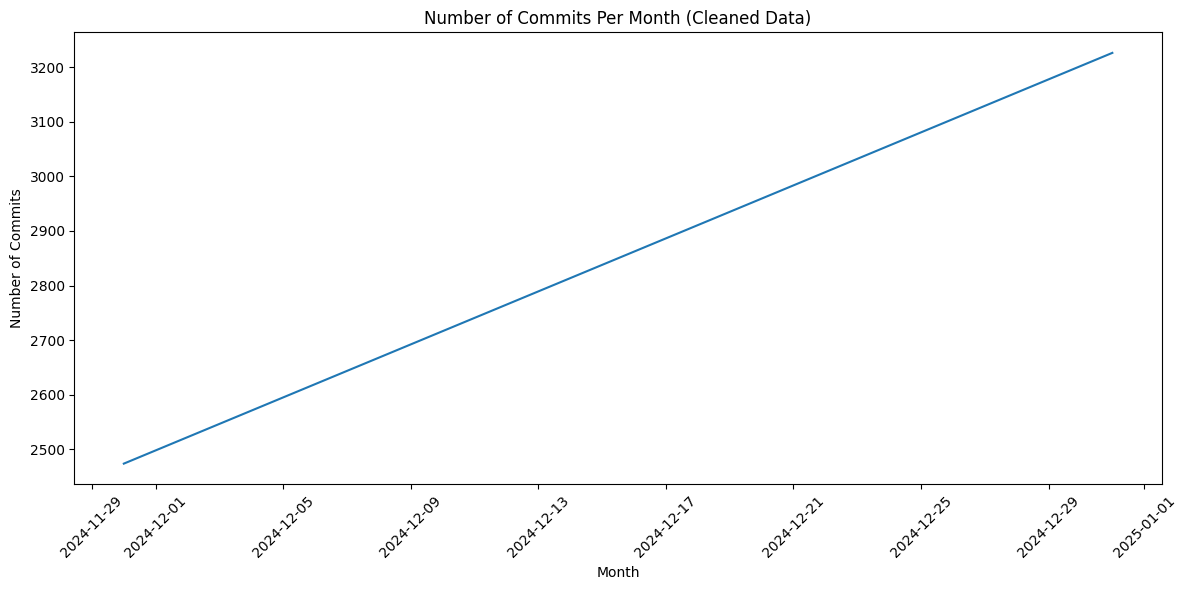

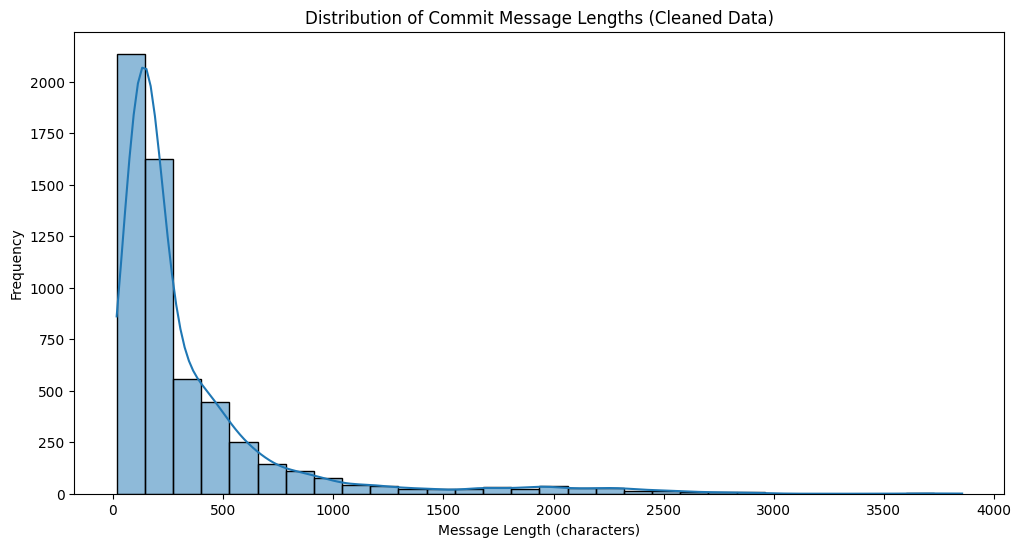

/tmp/ipykernel_8502/3685451115.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


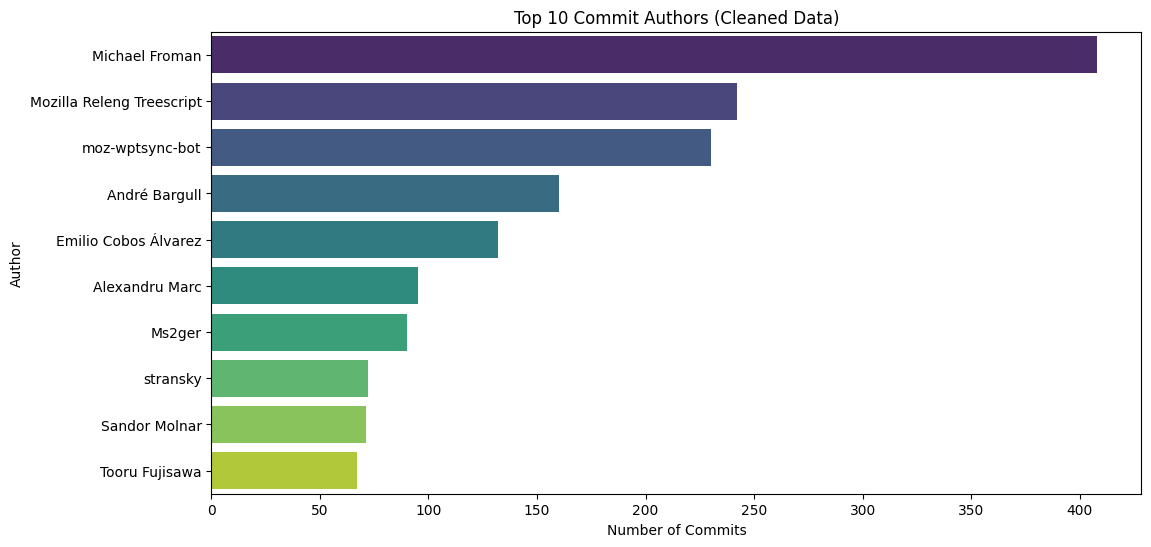

/tmp/ipykernel_8502/3685451115.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_list), y=list(words_list), palette='magma')


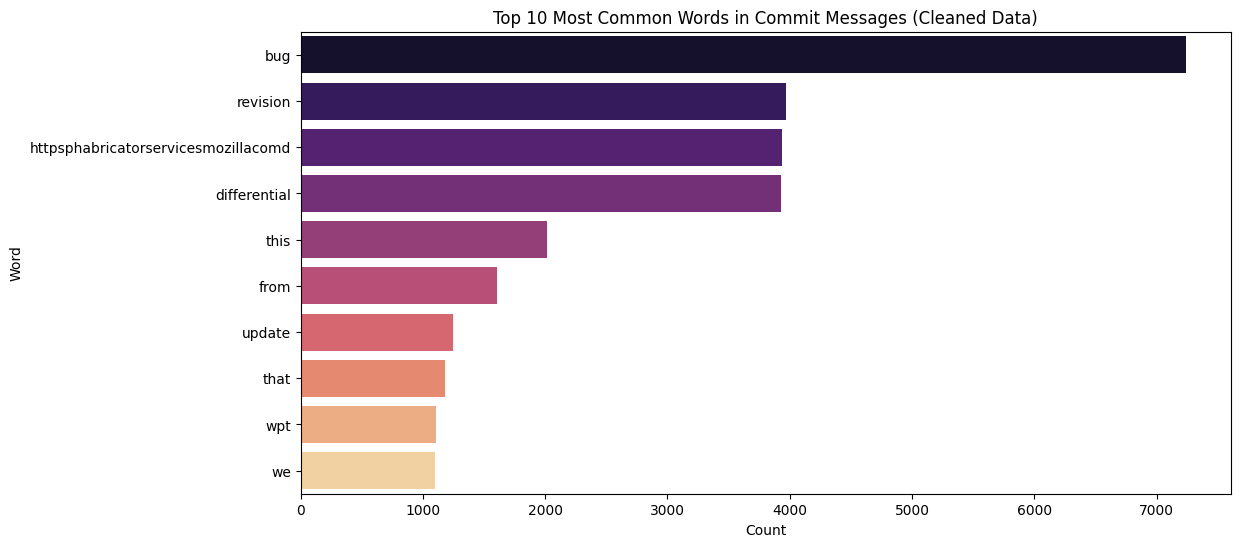

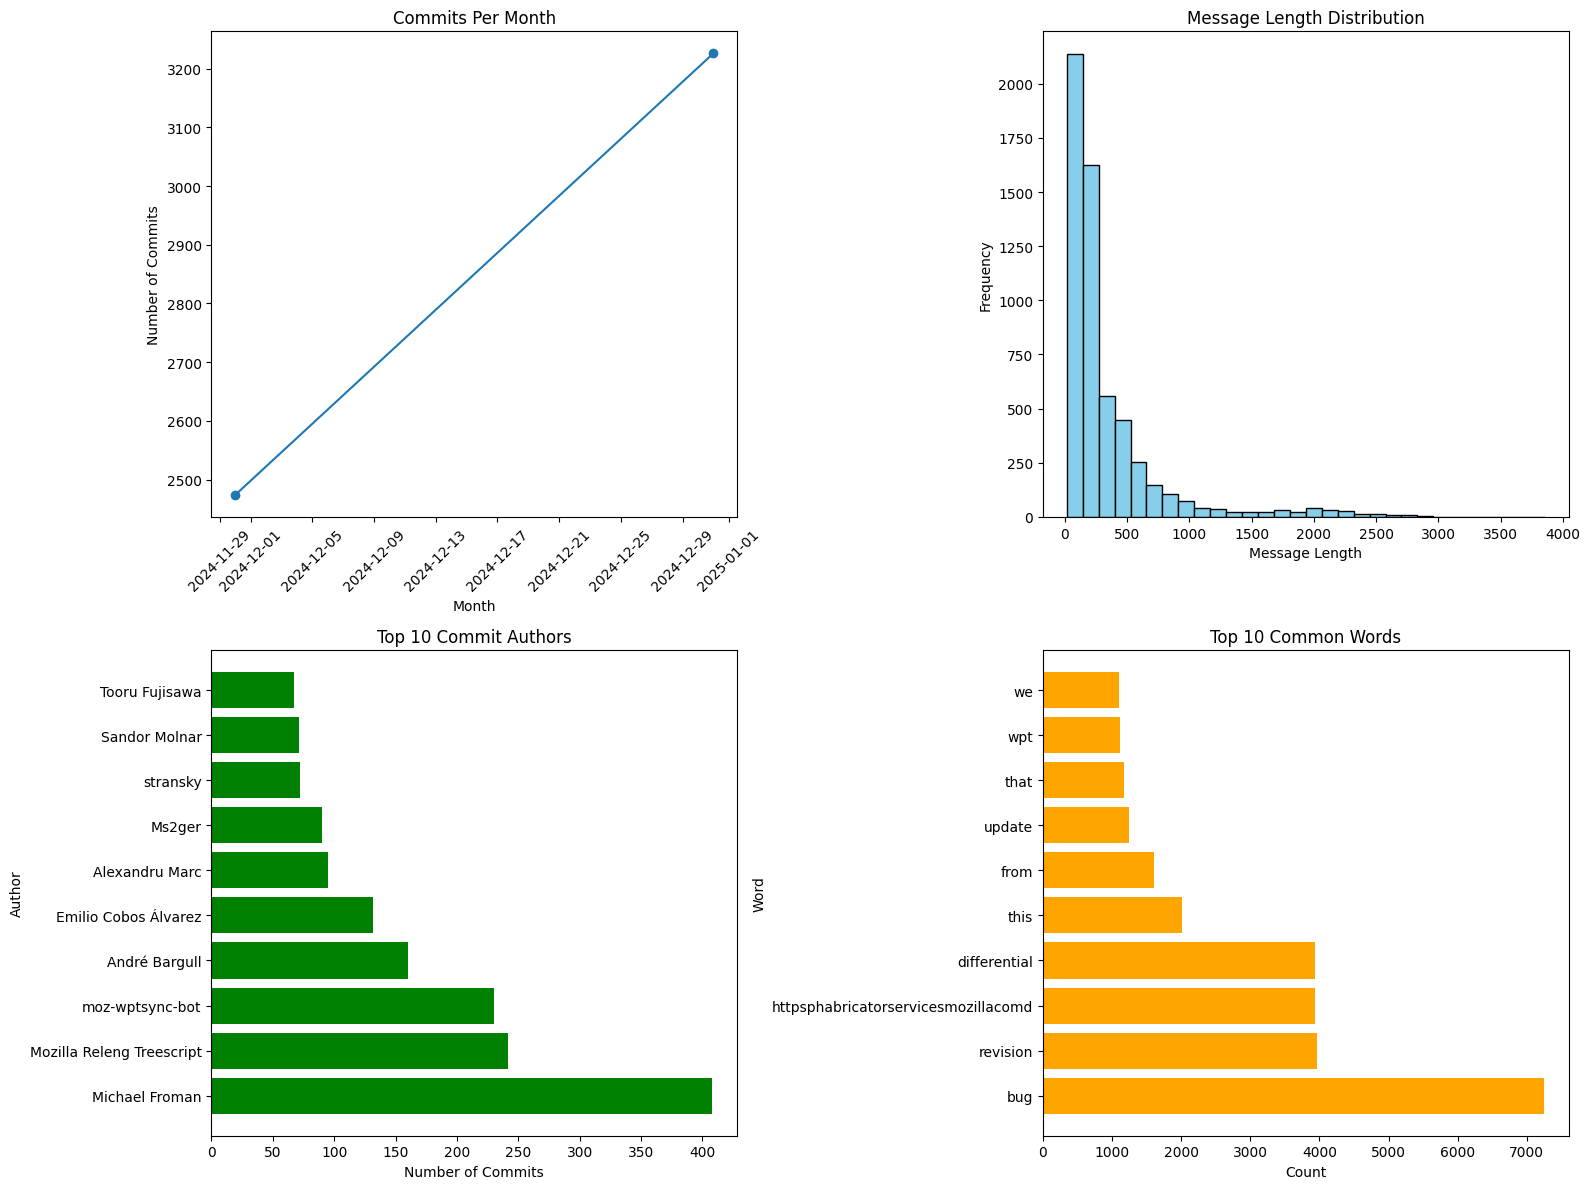

In [1]:
# --- Cleaned Data Analytics ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime
from collections import Counter

# Load cleaned commit data from CSV
df = pd.read_csv('cleaned_commits.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Compute commit message lengths if not already computed in CSV
if 'message_length' not in df.columns:
    df['message_length'] = df['message'].apply(len)

# --- Commit Frequency Over Time ---
df_time = df.set_index('date')
commits_by_month = df_time.resample('M').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=commits_by_month.index, y=commits_by_month.values)
plt.title('Number of Commits Per Month (Cleaned Data)')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Commit Message Length Distribution ---
plt.figure(figsize=(12, 6))
sns.histplot(df['message_length'], bins=30, kde=True)
plt.title('Distribution of Commit Message Lengths (Cleaned Data)')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.show()

# --- Top Commit Authors ---
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Commit Authors (Cleaned Data)')
plt.xlabel('Number of Commits')
plt.ylabel('Author')
plt.show()

# --- Word Frequency Analysis on Commit Messages ---
all_messages = ' '.join(df['message'])
words = re.findall(r'\w+', all_messages.lower())
stop_words = set(['the', 'and', 'to', 'of', 'a', 'in', 'for', 'on', 'with', 'is', 'it'])
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(10)
words_list, counts_list = zip(*common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts_list), y=list(words_list), palette='magma')
plt.title('Top 10 Most Common Words in Commit Messages (Cleaned Data)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# --- Combined Subplots ---
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Commits per Month
axs[0, 0].plot(commits_by_month.index, commits_by_month.values, marker='o')
axs[0, 0].set_title('Commits Per Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Number of Commits')
for label in axs[0, 0].get_xticklabels():
    label.set_rotation(45)

# Subplot 2: Message Length Distribution
axs[0, 1].hist(df['message_length'], bins=30, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Message Length Distribution')
axs[0, 1].set_xlabel('Message Length')
axs[0, 1].set_ylabel('Frequency')

# Subplot 3: Top 10 Authors
axs[1, 0].barh(top_authors.index, top_authors.values, color='green')
axs[1, 0].set_title('Top 10 Commit Authors')
axs[1, 0].set_xlabel('Number of Commits')
axs[1, 0].set_ylabel('Author')

# Subplot 4: Word Frequency
axs[1, 1].barh(words_list, counts_list, color='orange')
axs[1, 1].set_title('Top 10 Common Words')
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('Word')

plt.tight_layout()
plt.show()
